<a href="https://colab.research.google.com/github/vjeevankumar/Kaggle_Housing_competition_submission/blob/DEV/Kaggle_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


github test - updated

In [0]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [0]:
df2['GarageYrBlt'] =df2['GarageYrBlt'].fillna(0)
df2[['Alley','MasVnrType','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence','MiscFeature','PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
     'BsmtFinType2','GarageYrBlt']]= df2[['Alley','MasVnrType','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence','MiscFeature','PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageYrBlt']].fillna('NA')
df2.loc[948,'BsmtExposure'] ='NA'
df2.loc[332,['BsmtFinType2']] ='Unf'

In [0]:
ct_cols =['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','LandSlope','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','Neighborhood','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

df_with_dummies = pd.get_dummies(df2, columns = ct_cols)

df_with_dummies['LotFrontage']=df_with_dummies['LotFrontage'].fillna(70.049958)
df_with_dummies['MasVnrArea']=df_with_dummies['MasVnrArea'].fillna(103.685262)

from sklearn.preprocessing import MinMaxScaler

df_with_dummies.drop('Id',axis=1,inplace=True)

df2_minus_saleprice = df_with_dummies.drop('SalePrice',axis=1)
  
MMS = MinMaxScaler()
df2_normalized_saleprice = pd.DataFrame(MMS.fit_transform(df2_minus_saleprice),columns=df2_minus_saleprice.columns)
df2_normalized = df2_normalized_saleprice.join(df2['SalePrice'])

In [0]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
X = df2_normalized.drop('SalePrice',axis=1)
Y = df2_normalized['SalePrice']
# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
tt =model.feature_importances_
#print(tt)



In [0]:
import numpy as np
tt1=X.columns
ttt=['features','importance']
FS=pd.DataFrame(tt,tt1).sort_values(0,ascending=False)
Final_FS = FS[FS[0]>0.0015]
Final_FS.drop(0,axis=1,inplace=True)
FT =list(Final_FS.T)

clean_data = X[FT]
#clean_data=clean_data.join(Y)
#clean_data




/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
FS

,0
LotArea,0.020660
GrLivArea,0.020363
MoSold,0.020205
BsmtUnfSF,0.019859
1stFlrSF,0.019556
TotalBsmtSF,0.019518
GarageArea,0.019058
LotFrontage,0.018990
YrSold,0.018942
YearRemodAdd,0.018897


In [0]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 157), (292, 157), (1168,), (292,))

In [0]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: -1.4849926008209052e-21
Generation 2 - Current best internal CV score: -1.4849926008209052e-21
Generation 3 - Current best internal CV score: -1.4849926008209052e-21
Generation 4 - Current best internal CV score: -1.4849926008209052e-21
Generation 5 - Current best internal CV score: -7.50910196751766e-22

Best pipeline: LassoLarsCV(RobustScaler(LassoLarsCV(DecisionTreeRegressor(input_matrix, max_depth=7, min_samples_leaf=16, min_samples_split=10), normalize=True)), normalize=True)
-5.359223870042191e-22


Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=10, min_samples_split=4, n_estimators=100)
-1034345962.7841212

with 155 features
Best pipeline: RandomForestRegressor(LassoLarsCV(MinMaxScaler(input_matrix), normalize=True), bootstrap=True, max_features=0.7000000000000001, min_samples_leaf=4, min_samples_split=14, n_estimators=100)
-407773646.7237869



Best pipeline: LassoLarsCV(RobustScaler(LassoLarsCV(DecisionTreeRegressor(input_matrix, max_depth=7, min_samples_leaf=16, min_samples_split=10), normalize=True)), normalize=True)
-5.359223870042191e-22

In [0]:


from sklearn.tree import DecisionTreeRegressor

#DTR = DecisionTreeRegressor(max_depth=7, min_samples_leaf=16, min_samples_split=10)

#DTR.fit(X_train, y_train)

from sklearn.linear_model import LassoLarsCV

#LLC_1 = LassoLarsCV(DecisionTreeRegressor(max_depth=7, min_samples_leaf=16, min_samples_split=10),normalize=True)
#LLC_1.fit(X_train, y_train)

from sklearn.preprocessing import RobustScaler

#RS = RobustScaler(LassoLarsCV(DecisionTreeRegressor(max_depth=7, min_samples_leaf=16, min_samples_split=10), normalize=True))

#RS.fit(X_train, y_train)

LLC_2 = LassoLarsCV(RobustScaler(LassoLarsCV(DecisionTreeRegressor(max_depth=7, min_samples_leaf=16, min_samples_split=10), normalize=True)), normalize=True)
LLC_2.fit(X_train, y_train)

train_result = LLC_2.score(X_train, y_train)
#yy=0
yy=pd.DataFrame(LLC_2.predict(X_test))
test_result = LLC_2.score(X_test, y_test)
print(train_result)
print(test_result)

y_test_reindexed = pd.DataFrame(y_test.reset_index())
test_comp = y_test_reindexed.join(yy)
#print(test_comp)
#max_iter=15

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 80 iterations, i.e. alpha=1.987e+01, with an active set of 70 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 99 iterations, i.e. alpha=1.295e+01, with an active set of 89 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/di

0.9011677162644302
0.7323169317705382


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 60 iterations, i.e. alpha=2.710e+01, with an active set of 58 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 75 iterations, i.e. alpha=1.984e+01, with an active set of 73 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 102 iterations, i.e. alpha=9.918e+00, with an active set of 96 regressors, and the smallest cholesky pivot elem

In [0]:
#xx
#pd.DataFrame(y_test,pd.DataFrame(xx))
#pd.DataFrame(xx)

#y_test.reset_index()
y_test_reindexed = pd.DataFrame(y_test.reset_index())

print(y_test_reindexed.shape)
print(xx.shape)

y_test_reindexed.join(xx)
#xx
#y_test_reindexed
#200624.0
#133000.0


(292, 2)


NameError: ignored

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoLarsCV
#from sklearn.preprocessing import MinMaxScaler

#reg = LassoLarsCV(cv=5).fit(tt1, y_train)
#LassoLarsCV( tt1, normalize=True),
regr = RandomForestRegressor(bootstrap=True, max_features=0.7000000000000001, min_samples_leaf=4, min_samples_split=14, n_estimators=100)

#tt= MinMaxScaler()
#tt1=tt.fit_transform(X_train)
regr.fit(X_train, y_train)  

train_result = regr.score(X_train, y_train)

# transform for MinMax scaler
#tt2 = tt.fit_transform(X_test)

xx=pd.DataFrame(regr.predict(X_test))
test_result = regr.score(X_test, y_test)
#xxx=pd.DataFrame(y_test, xx)

print(train_result)
print(test_result)




#164982.2909457 , 216346.2493097  -pred

#1010    135000
#1433    186500






0.9267400236884131
0.2272252469284931


In [0]:
import seaborn as sns
sns.boxplot(y=clean_data['BsmtUnfSF'])
Q1 = clean_data['BsmtUnfSF'].quantile(0.25)
Q3 = clean_data['BsmtUnfSF'].quantile(0.75)
IQR=Q3-Q1
Qmax = Q3+(1.5*IQR)
print(IQR, Qmax)
clean_data[clean_data['BsmtUnfSF'] > Qmax]

In [0]:
y_test

In [0]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)  
df_with_dummies = imputer.fit_transform(df_with_dummies)
df_with_dummies = pd.DataFrame(df_with_dummies)
 #df_with_dummies = imputer.fit
 #df_with_dummies.transform


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
tt.fit

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [0]:
df4 = df3[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']]
   

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

N_SPLITS = 5

rng = np.random.RandomState(0)

X_full, y_full = fetch_california_housing(return_X_y=True)
# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
X_full = X_full[::10]
y_full = y_full[::10]
n_samples, n_features = X_full.shape

# Estimate the score on the entire dataset, with no missing values
br_estimator = BayesianRidge()
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    columns=['Full Data']
)

# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1
)

# plot boston results
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('California Housing Regression with Different Imputation Methods')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.get_values()])
plt.tight_layout(pad=1)
plt.show()

In [0]:
LotArea_Q1 = df2['LotArea'].quantile(0.25)
LotArea_Q3 = df2['LotArea'].quantile(0.75)
IQR = LotArea_Q3-LotArea_Q1

LotArea_max = LotArea_Q3 + (1.5*IQR)


df3 = df2[df2['LotArea'] <= LotArea_max]
dfd=df3
dfd.loc[dfd['LotArea'] <= LotArea_max]['LotArea'] = 17673.5
dfd
#rint(LotArea_max)



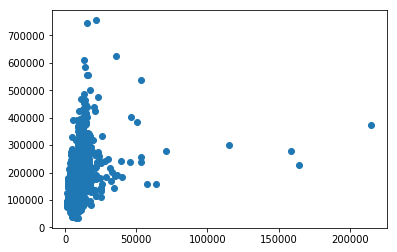

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

scat = plt.scatter(x=df2['LotArea'], y=df2['SalePrice'])

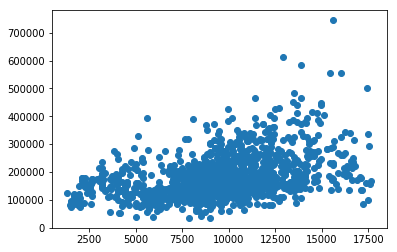

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#df3 = df2['Lot']

scat = plt.scatter(x=df3['LotArea'], y=df3['SalePrice'])

[-5.60321424] 181182.02167533064


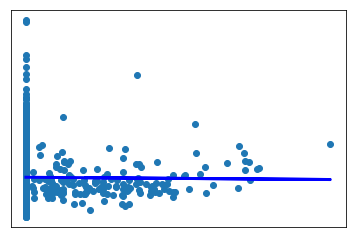

In [0]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#linear_model
skl = linear_model.LinearRegression()

arr = np.float64(df2['BsmtFinSF2'])
arr1 = np.reshape(arr,(len(df2),1))



skl.fit(arr1,df2['SalePrice'])
pred = skl.predict(arr1)
plt.scatter(x=df2['BsmtFinSF2'], y=df2['SalePrice'])
plt.plot(arr1, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
print(skl.coef_,skl.intercept_)
plt.show()


[-5.60321424] 181182.02167533064


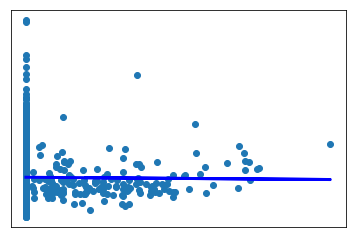

In [0]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#linear_model
skl = linear_model.LinearRegression()

arr = np.float64(df3['BsmtFinSF2'])
arr1 = np.reshape(arr,(len(df3),1))



skl.fit(arr1,df3['SalePrice'])
pred = skl.predict(arr1)
plt.scatter(x=df3['BsmtFinSF2'], y=df3['SalePrice'])
plt.plot(arr1, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
print(skl.coef_,skl.intercept_)
plt.show()


[9.55185837] 88771.92886711944


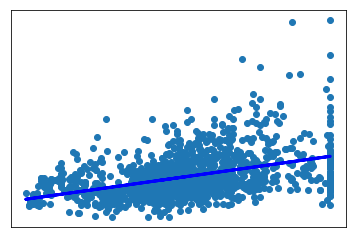

In [0]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#linear_model
skl = linear_model.LinearRegression()

arr = np.float64(dfd['LotArea'])
arr1 = np.reshape(arr,(len(dfd),1))



skl.fit(arr1,dfd['SalePrice'])
pred = skl.predict(arr1)
plt.scatter(x=dfd['LotArea'], y=dfd['SalePrice'])
plt.plot(arr1, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
print(skl.coef_,skl.intercept_)
plt.show()

In [0]:
print(skl.coef_,skl.intercept_)

[9.55185837] 88771.92886711944


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


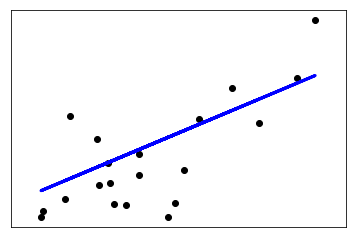

In [0]:
#print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
import numpy as np
test=np.float64(df2['LotArea'])

In [0]:
np.reshape(test, (1460, 1)).shape

Exception: ignored

In [0]:
LotArea_Q1 = df2['LotArea'].quantile(0.25)
LotArea_Q3 = df2['LotArea'].quantile(0.75)
IQR = LotArea_Q3-LotArea_Q1

LotArea_max = LotArea_Q3 + (1.5*IQR)

df3 = df2[df2['LotArea'] <= LotArea_max]
dfd=df2

dfd.loc[dfd.loc[:,'LotArea'] >LotArea_max,'LotArea'] = 17673.5

(df2['LotArea'] >LotArea_max).sum()

0

Kaggle test starts

In [0]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
import io
import pandas as pd
df2_ktest = pd.read_csv(io.BytesIO(uploaded['kaggle_test.csv']))

In [0]:
df2_ktest['GarageYrBlt'] =df2_ktest['GarageYrBlt'].fillna(0)
df2_ktest[['Alley','MasVnrType','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence','MiscFeature','PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
     'BsmtFinType2','GarageYrBlt']]= df2_ktest[['Alley','MasVnrType','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','Fence','MiscFeature','PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageYrBlt']].fillna('NA')
#df2_ktest.loc[[27,888],'BsmtExposure'] ='No'    


In [0]:
ct_cols =['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','LandSlope','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','Neighborhood','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

df_with_dummies = pd.get_dummies(df2_ktest, columns = ct_cols)

df_with_dummies['LotFrontage']=df_with_dummies['LotFrontage'].fillna(70.049958)
df_with_dummies['MasVnrArea']=df_with_dummies['MasVnrArea'].fillna(103.685262)

from sklearn.preprocessing import MinMaxScaler

df_with_dummies.drop('Id',axis=1,inplace=True)

#df2_minus_saleprice = df_with_dummies.drop('SalePrice',axis=1)
df2_minus_saleprice=df_with_dummies
  
MMS = MinMaxScaler()
df2_normalized_saleprice = pd.DataFrame(MMS.fit_transform(df2_minus_saleprice),columns=df2_minus_saleprice.columns)
#df2_normalized = df2_normalized_saleprice.join(df2['SalePrice'])
X=df2_normalized_saleprice

In [0]:
X=df2_normalized_saleprice
import numpy as np
tt1=X.columns
ttt=['features','importance']
FS=pd.DataFrame(tt,tt1).sort_values(0,ascending=False)
Final_FS = FS[FS[0]>0.0015]
Final_FS.drop(0,axis=1,inplace=True)
FT =list(Final_FS.T)

clean_data = X[FT]

In [0]:
df2_ktest.shape()

TypeError: ignored